In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Car_sales.csv')

In [3]:
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [4]:
len(df.Manufacturer.unique())

30

In [5]:
len(df.Model.unique())

156

In [6]:
df.isnull().mean()*100

Manufacturer            0.000000
Model                   0.000000
Sales_in_thousands      0.000000
__year_resale_value    22.929936
Vehicle_type            0.000000
Price_in_thousands      1.273885
Engine_size             0.636943
Horsepower              0.636943
Wheelbase               0.636943
Width                   0.636943
Length                  0.636943
Curb_weight             1.273885
Fuel_capacity           0.636943
Fuel_efficiency         1.910828
Latest_Launch           0.000000
Power_perf_factor       1.273885
dtype: float64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().mean()*100

Manufacturer           0.0
Model                  0.0
Sales_in_thousands     0.0
__year_resale_value    0.0
Vehicle_type           0.0
Price_in_thousands     0.0
Engine_size            0.0
Horsepower             0.0
Wheelbase              0.0
Width                  0.0
Length                 0.0
Curb_weight            0.0
Fuel_capacity          0.0
Fuel_efficiency        0.0
Latest_Launch          0.0
Power_perf_factor      0.0
dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 149
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         117 non-null    object 
 1   Model                117 non-null    object 
 2   Sales_in_thousands   117 non-null    float64
 3   __year_resale_value  117 non-null    float64
 4   Vehicle_type         117 non-null    object 
 5   Price_in_thousands   117 non-null    float64
 6   Engine_size          117 non-null    float64
 7   Horsepower           117 non-null    float64
 8   Wheelbase            117 non-null    float64
 9   Width                117 non-null    float64
 10  Length               117 non-null    float64
 11  Curb_weight          117 non-null    float64
 12  Fuel_capacity        117 non-null    float64
 13  Fuel_efficiency      117 non-null    float64
 14  Latest_Launch        117 non-null    object 
 15  Power_perf_factor    117 non-null    flo

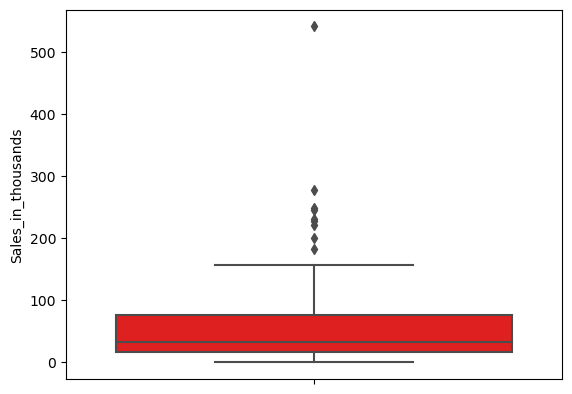

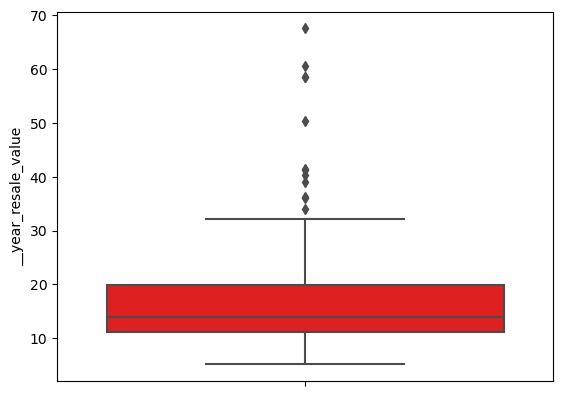

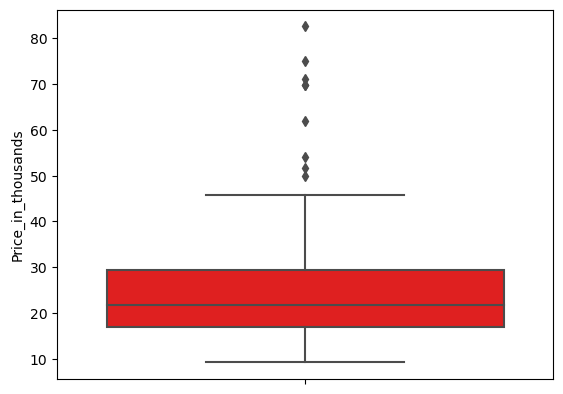

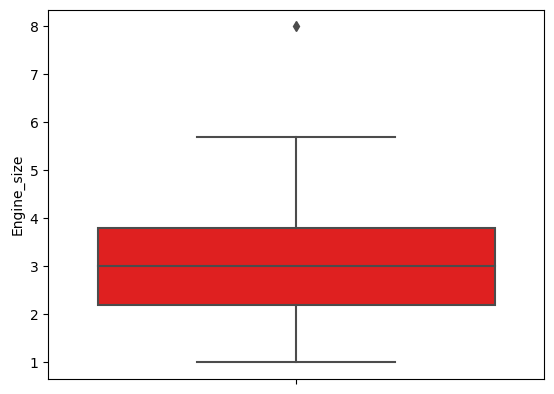

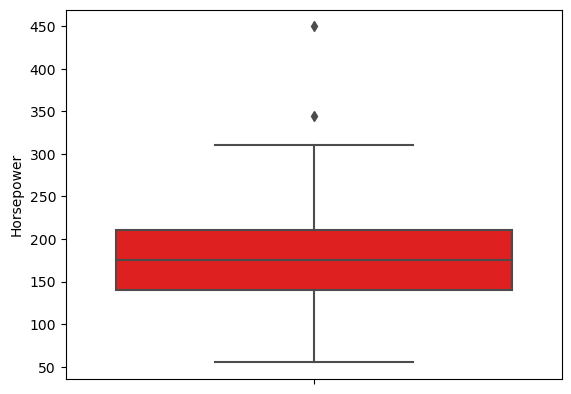

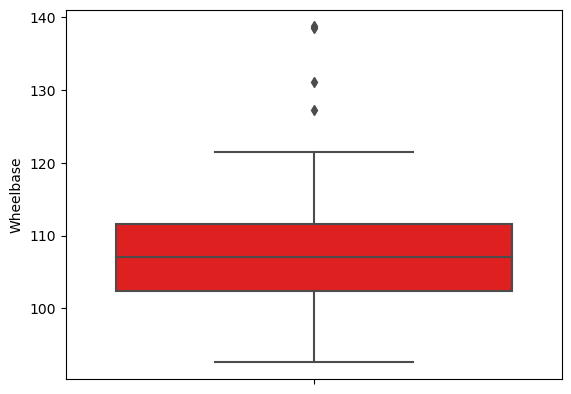

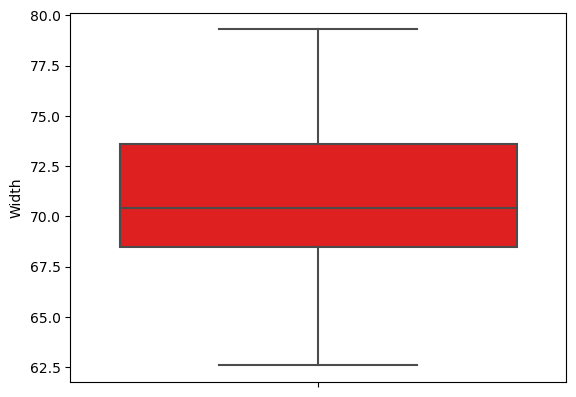

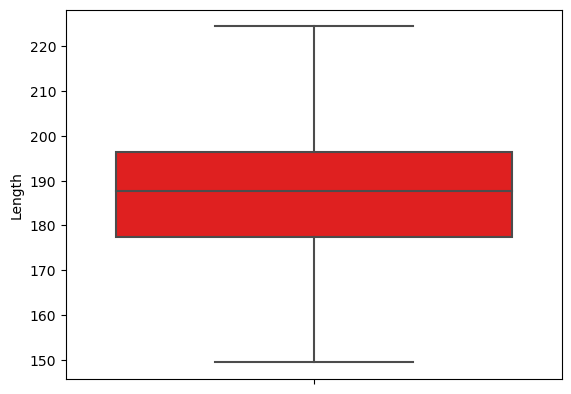

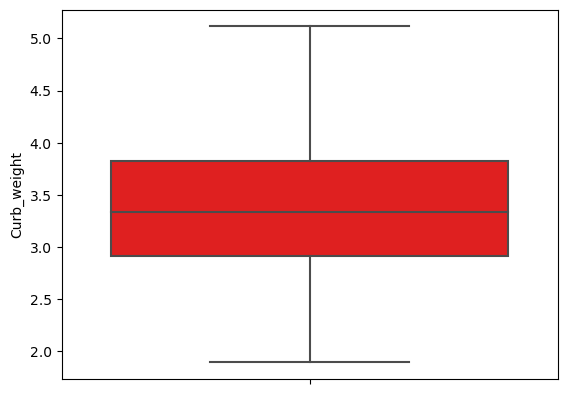

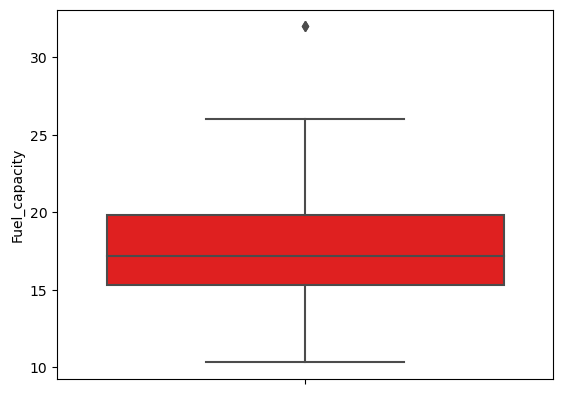

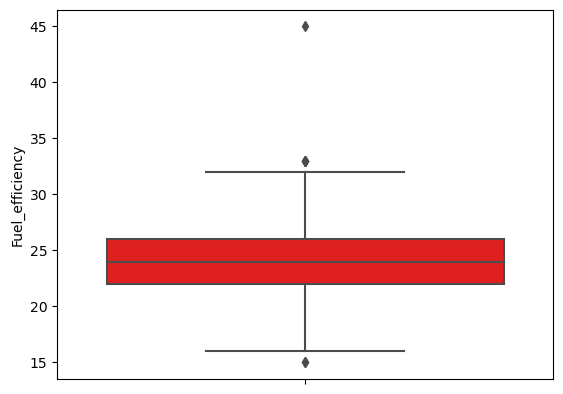

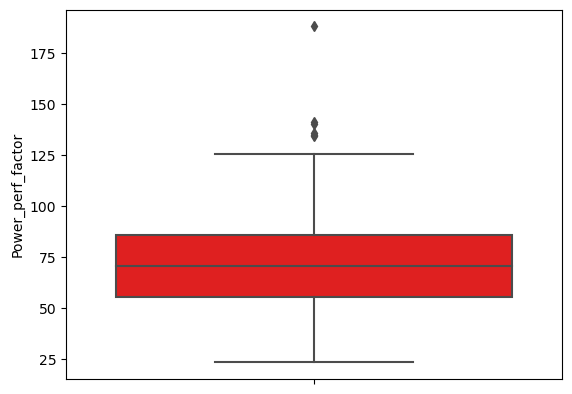

In [10]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.boxplot(y=df[i],color="red")
        plt.show()

In [11]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*Q1
    return UL,LL

In [12]:
for column in df.columns:
        if df[column].dtype != 'object':
            UL,LL=outlier_limit(df[column])
            df[column]=np.where((df[column]>UL)|(df[column]<LL),np.nan,df[i])

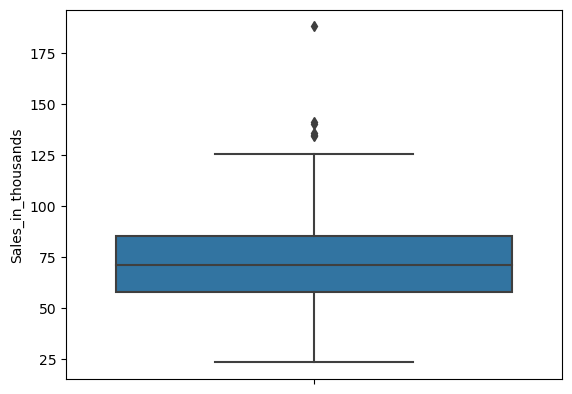

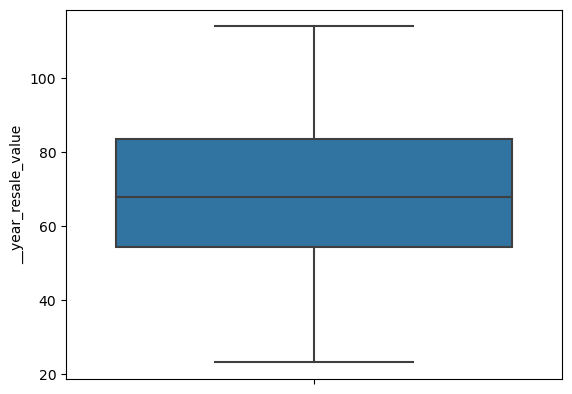

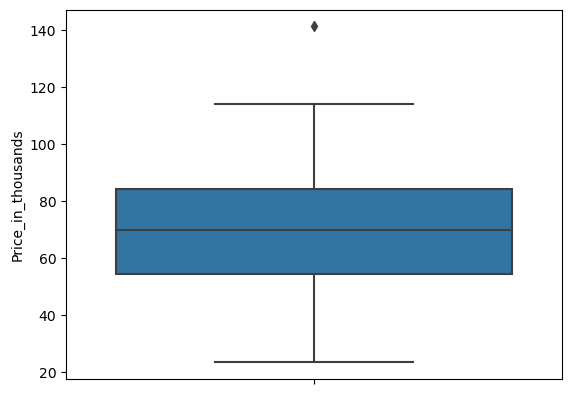

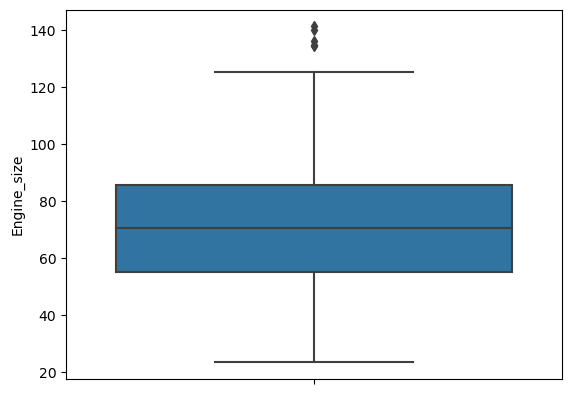

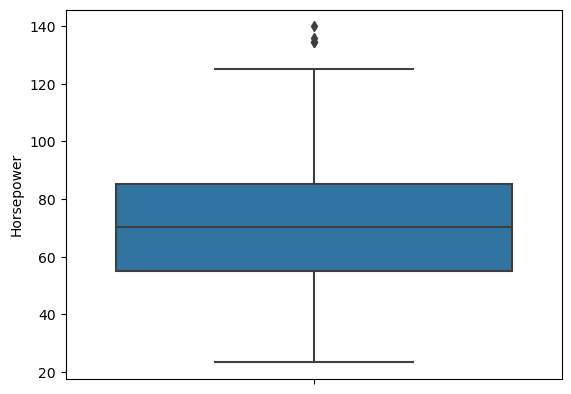

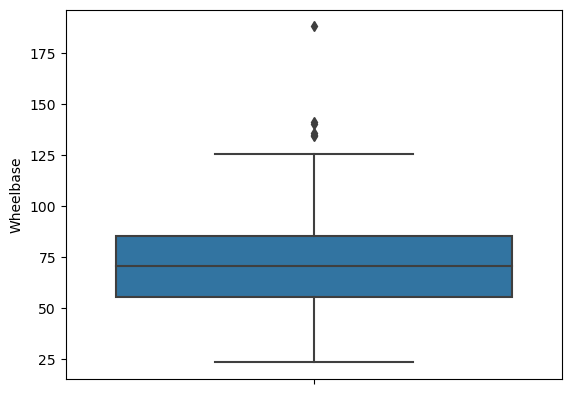

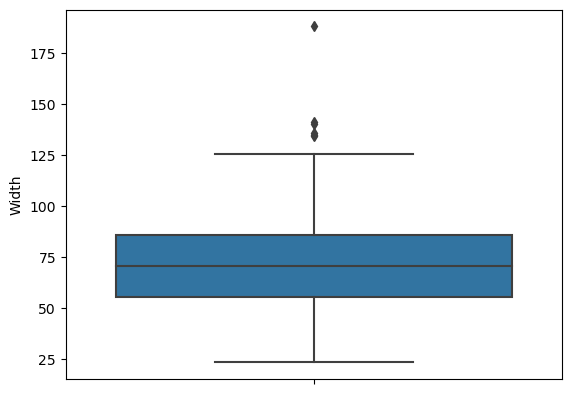

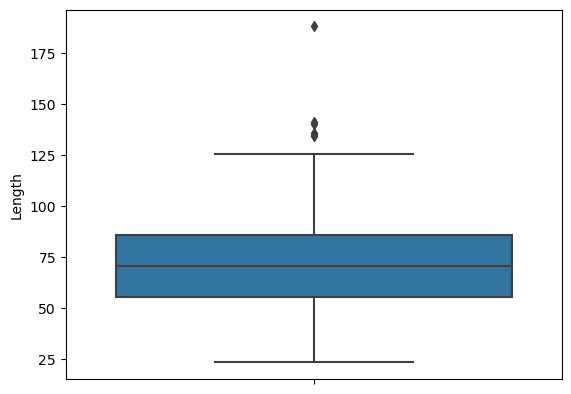

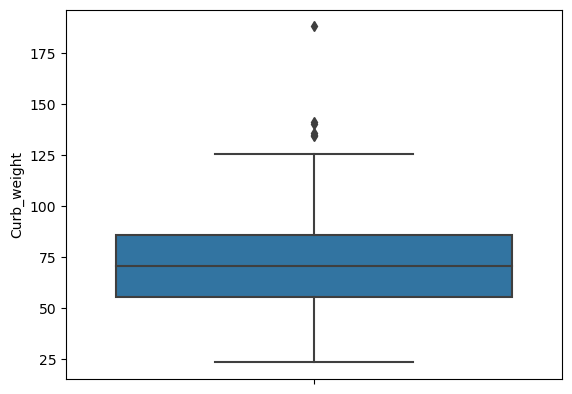

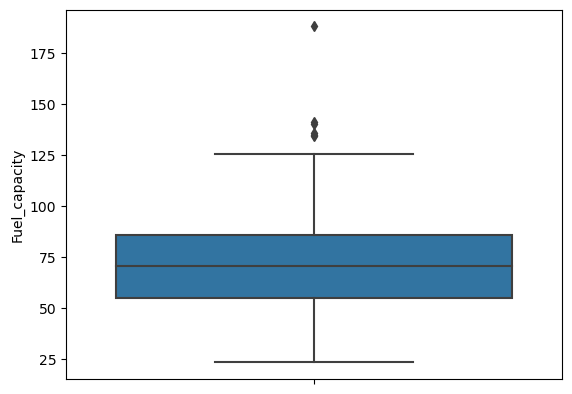

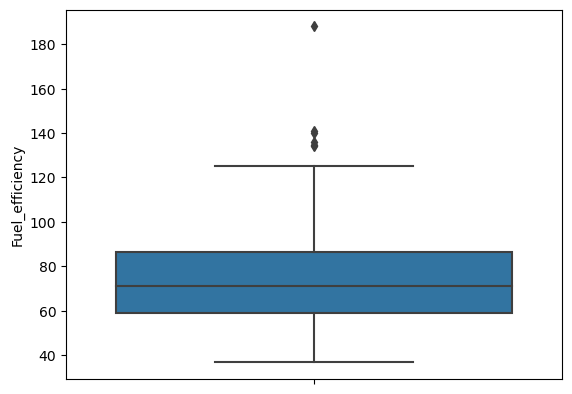

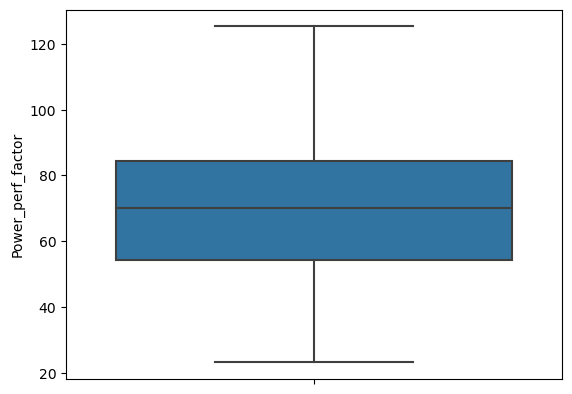

In [13]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.boxplot(y=df[i], data = df)
        plt.show()

In [14]:
df.isnull().mean()*100

Manufacturer            0.000000
Model                   0.000000
Sales_in_thousands      7.692308
__year_resale_value    10.256410
Vehicle_type            0.000000
Price_in_thousands      7.692308
Engine_size             0.854701
Horsepower              1.709402
Wheelbase               3.418803
Width                   0.000000
Length                  0.000000
Curb_weight             0.000000
Fuel_capacity           1.709402
Fuel_efficiency         4.273504
Latest_Launch           0.000000
Power_perf_factor       5.128205
dtype: float64

In [15]:
df.dropna(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 149
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         88 non-null     object 
 1   Model                88 non-null     object 
 2   Sales_in_thousands   88 non-null     float64
 3   __year_resale_value  88 non-null     float64
 4   Vehicle_type         88 non-null     object 
 5   Price_in_thousands   88 non-null     float64
 6   Engine_size          88 non-null     float64
 7   Horsepower           88 non-null     float64
 8   Wheelbase            88 non-null     float64
 9   Width                88 non-null     float64
 10  Length               88 non-null     float64
 11  Curb_weight          88 non-null     float64
 12  Fuel_capacity        88 non-null     float64
 13  Fuel_efficiency      88 non-null     float64
 14  Latest_Launch        88 non-null     object 
 15  Power_perf_factor    88 non-null     floa

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le=LabelEncoder()

In [19]:
df["Le_Vehicle"]=le.fit_transform(df.Vehicle_type)

In [20]:
df.sample(10)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Le_Vehicle
121,Pontiac,Grand Prix,78.318168,78.318168,Passenger,78.318168,78.318168,78.318168,78.318168,78.318168,78.318168,78.318168,78.318168,78.318168,10/15/2012,78.318168,1
122,Pontiac,Bonneville,82.661356,82.661356,Passenger,82.661356,82.661356,82.661356,82.661356,82.661356,82.661356,82.661356,82.661356,82.661356,5/18/2011,82.661356,1
3,Acura,RL,91.389779,91.389779,Passenger,91.389779,91.389779,91.389779,91.389779,91.389779,91.389779,91.389779,91.389779,91.389779,3/10/2011,91.389779,1
87,Mercury,Cougar,51.113474,51.113474,Passenger,51.113474,51.113474,51.113474,51.113474,51.113474,51.113474,51.113474,51.113474,51.113474,2/23/2012,51.113474,1
92,Mercedes-B,C-Class,78.280731,78.280731,Passenger,78.280731,78.280731,78.280731,78.280731,78.280731,78.280731,78.280731,78.280731,78.280731,4/24/2011,78.280731,1
143,Toyota,4Runner,62.355577,62.355577,Car,62.355577,62.355577,62.355577,62.355577,62.355577,62.355577,62.355577,62.355577,62.355577,3/7/2011,62.355577,0
35,Dodge,Neon,52.084899,52.084899,Passenger,52.084899,52.084899,52.084899,52.084899,52.084899,52.084899,52.084899,52.084899,52.084899,12/12/2011,52.084899,1
19,Chevrolet,Cavalier,46.363347,46.363347,Passenger,46.363347,46.363347,46.363347,46.363347,46.363347,46.363347,46.363347,46.363347,46.363347,8/17/2011,46.363347,1
67,Jeep,Wrangler,48.672898,48.672898,Car,48.672898,48.672898,48.672898,48.672898,48.672898,48.672898,48.672898,48.672898,48.672898,3/4/2012,48.672898,0
22,Chevrolet,Monte Carlo,72.030917,72.030917,Passenger,72.030917,72.030917,72.030917,72.030917,72.030917,72.030917,72.030917,72.030917,72.030917,12/22/2011,72.030917,1


In [21]:
df["Le_Manufacturer"]=le.fit_transform(df.Manufacturer)
df.sample(10)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Le_Vehicle,Le_Manufacturer
12,Buick,Park Avenue,85.828408,85.828408,Passenger,85.828408,85.828408,85.828408,85.828408,85.828408,85.828408,85.828408,85.828408,85.828408,3/23/2012,85.828408,1,3
46,Ford,Escort,44.083709,44.083709,Passenger,44.083709,44.083709,44.083709,44.083709,44.083709,44.083709,44.083709,44.083709,44.083709,3/31/2012,44.083709,1,8
82,Mitsubishi,Diamante,84.830779,84.830779,Passenger,84.830779,84.830779,84.830779,84.830779,84.830779,84.830779,84.830779,84.830779,84.830779,8/28/2012,84.830779,1,17
114,Plymouth,Neon,52.084899,52.084899,Passenger,52.084899,52.084899,52.084899,52.084899,52.084899,52.084899,52.084899,52.084899,52.084899,4/26/2011,52.084899,1,20
36,Dodge,Avenger,65.650508,65.650508,Passenger,65.650508,65.650508,65.650508,65.650508,65.650508,65.650508,65.650508,65.650508,65.650508,7/1/2012,65.650508,1,7
71,Lexus,GS300,94.946698,94.946698,Passenger,94.946698,94.946698,94.946698,94.946698,94.946698,94.946698,94.946698,94.946698,94.946698,5/10/2012,94.946698,1,13
61,Honda,Odyssey,85.217691,85.217691,Car,85.217691,85.217691,85.217691,85.217691,85.217691,85.217691,85.217691,85.217691,85.217691,2/8/2012,85.217691,0,9
140,Toyota,Tacoma,55.297117,55.297117,Car,55.297117,55.297117,55.297117,55.297117,55.297117,55.297117,55.297117,55.297117,55.297117,8/1/2011,55.297117,0,23
91,Mercury,Villager,69.671461,69.671461,Car,69.671461,69.671461,69.671461,69.671461,69.671461,69.671461,69.671461,69.671461,69.671461,10/20/2009,69.671461,0,16
145,Volkswagen,Golf,46.943877,46.943877,Passenger,46.943877,46.943877,46.943877,46.943877,46.943877,46.943877,46.943877,46.943877,46.943877,1/24/2011,46.943877,1,24


In [22]:
df["Le_Model"]=le.fit_transform(df.Model)
df.sample(10)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Le_Vehicle,Le_Manufacturer,Le_Model
116,Plymouth,Voyager,60.951185,60.951185,Car,60.951185,60.951185,60.951185,60.951185,60.951185,60.951185,60.951185,60.951185,60.951185,4/24/2011,60.951185,0,20,84
83,Mitsubishi,3000GT,67.544155,67.544155,Passenger,67.544155,67.544155,67.544155,67.544155,67.544155,67.544155,67.544155,67.544155,67.544155,6/29/2012,67.544155,1,17,0
10,Buick,Century,71.181451,71.181451,Passenger,71.181451,71.181451,71.181451,71.181451,71.181451,71.181451,71.181451,71.181451,71.181451,11/2/2011,71.181451,1,3,20
143,Toyota,4Runner,62.355577,62.355577,Car,62.355577,62.355577,62.355577,62.355577,62.355577,62.355577,62.355577,62.355577,62.355577,3/7/2011,62.355577,0,23,2
65,Infiniti,I30,92.436889,92.436889,Passenger,92.436889,92.436889,92.436889,92.436889,92.436889,92.436889,92.436889,92.436889,92.436889,4/15/2012,92.436889,1,11,46
102,Nissan,Altima,63.313728,63.313728,Passenger,63.313728,63.313728,63.313728,63.313728,63.313728,63.313728,63.313728,63.313728,63.313728,8/2/2011,63.313728,1,18,6
68,Jeep,Cherokee,76.584440,76.584440,Car,76.584440,76.584440,76.584440,76.584440,76.584440,76.584440,76.584440,76.584440,76.584440,10/5/2012,76.584440,0,12,21
48,Ford,Contour,67.351011,67.351011,Passenger,67.351011,67.351011,67.351011,67.351011,67.351011,67.351011,67.351011,67.351011,67.351011,8/20/2012,67.351011,1,8,25
70,Lexus,ES300,87.211001,87.211001,Passenger,87.211001,87.211001,87.211001,87.211001,87.211001,87.211001,87.211001,87.211001,87.211001,7/9/2012,87.211001,1,13,31
28,Chrysler,Sebring Coupe,65.957184,65.957184,Passenger,65.957184,65.957184,65.957184,65.957184,65.957184,65.957184,65.957184,65.957184,65.957184,1/16/2012,65.957184,1,6,74


In [23]:
df["Le_Latest_Launch"]=le.fit_transform(df.Latest_Launch)
df.sample(10)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Le_Vehicle,Le_Manufacturer,Le_Model,Le_Latest_Launch
59,Honda,CR-V,60.087967,60.087967,Car,60.087967,60.087967,60.087967,60.087967,60.087967,60.087967,60.087967,60.087967,60.087967,3/21/2012,60.087967,0,9,14,36
89,Mercury,Grand Marquis,80.657696,80.657696,Passenger,80.657696,80.657696,80.657696,80.657696,80.657696,80.657696,80.657696,80.657696,80.657696,7/24/2012,80.657696,1,16,44,62
108,Oldsmobile,Cutlass,60.861612,60.861612,Passenger,60.861612,60.861612,60.861612,60.861612,60.861612,60.861612,60.861612,60.861612,60.861612,5/31/2011,60.861612,1,19,28,50
92,Mercedes-B,C-Class,78.280731,78.280731,Passenger,78.280731,78.280731,78.280731,78.280731,78.280731,78.280731,78.280731,78.280731,78.280731,4/24/2011,78.280731,1,15,13,44
61,Honda,Odyssey,85.217691,85.217691,Car,85.217691,85.217691,85.217691,85.217691,85.217691,85.217691,85.217691,85.217691,85.217691,2/8/2012,85.217691,0,9,62,33
115,Plymouth,Breeze,53.411898,53.411898,Passenger,53.411898,53.411898,53.411898,53.411898,53.411898,53.411898,53.411898,53.411898,53.411898,11/14/2011,53.411898,1,20,12,16
19,Chevrolet,Cavalier,46.363347,46.363347,Passenger,46.363347,46.363347,46.363347,46.363347,46.363347,46.363347,46.363347,46.363347,46.363347,8/17/2011,46.363347,1,5,18,65
62,Hyundai,Accent,36.672284,36.672284,Passenger,36.672284,36.672284,36.672284,36.672284,36.672284,36.672284,36.672284,36.672284,36.672284,9/10/2012,36.672284,1,10,5,73
111,Oldsmobile,Aurora,103.441693,103.441693,Passenger,103.441693,103.441693,103.441693,103.441693,103.441693,103.441693,103.441693,103.441693,103.441693,2/18/2011,103.441693,1,19,7,29
16,Cadillac,Eldorado,113.765874,113.765874,Passenger,113.765874,113.765874,113.765874,113.765874,113.765874,113.765874,113.765874,113.765874,113.765874,11/27/2011,113.765874,1,4,34,22


In [24]:
df1=df.drop(columns=['Manufacturer','Model','Vehicle_type','Latest_Launch'])

In [25]:
df1

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Le_Vehicle,Le_Manufacturer,Le_Model,Le_Latest_Launch
0,58.280150,58.280150,58.280150,58.280150,58.280150,58.280150,58.280150,58.280150,58.280150,58.280150,58.280150,58.280150,1,0,47,30
1,91.370778,91.370778,91.370778,91.370778,91.370778,91.370778,91.370778,91.370778,91.370778,91.370778,91.370778,91.370778,1,0,80,57
3,91.389779,91.389779,91.389779,91.389779,91.389779,91.389779,91.389779,91.389779,91.389779,91.389779,91.389779,91.389779,1,0,69,34
4,62.777639,62.777639,62.777639,62.777639,62.777639,62.777639,62.777639,62.777639,62.777639,62.777639,62.777639,62.777639,1,1,3,14
5,84.565105,84.565105,84.565105,84.565105,84.565105,84.565105,84.565105,84.565105,84.565105,84.565105,84.565105,84.565105,1,1,4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,46.943877,46.943877,46.943877,46.943877,46.943877,46.943877,46.943877,46.943877,46.943877,46.943877,46.943877,46.943877,1,24,41,3
146,47.638237,47.638237,47.638237,47.638237,47.638237,47.638237,47.638237,47.638237,47.638237,47.638237,47.638237,47.638237,1,24,48,68
147,61.701381,61.701381,61.701381,61.701381,61.701381,61.701381,61.701381,61.701381,61.701381,61.701381,61.701381,61.701381,1,24,64,10
148,48.907372,48.907372,48.907372,48.907372,48.907372,48.907372,48.907372,48.907372,48.907372,48.907372,48.907372,48.907372,1,24,15,50


In [27]:
df1.isnull().mean()*100

Sales_in_thousands     0.0
__year_resale_value    0.0
Price_in_thousands     0.0
Engine_size            0.0
Horsepower             0.0
Wheelbase              0.0
Width                  0.0
Length                 0.0
Curb_weight            0.0
Fuel_capacity          0.0
Fuel_efficiency        0.0
Power_perf_factor      0.0
Le_Vehicle             0.0
Le_Manufacturer        0.0
Le_Model               0.0
Le_Latest_Launch       0.0
dtype: float64